In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
adv = pd.read_csv('advertising.csv', index_col=0)
adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
adv.shape

(200, 4)

In [6]:
adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


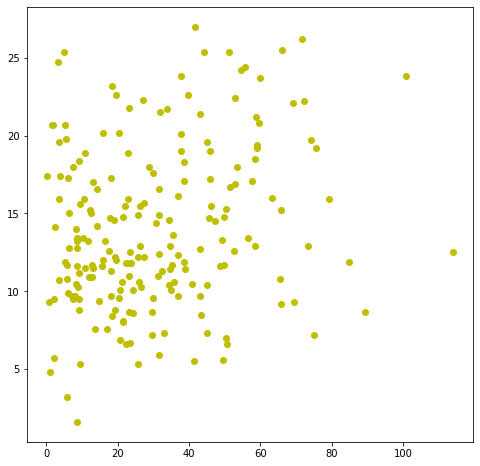

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(adv['newspaper'], adv['sales'], c= 'y')
plt.show()

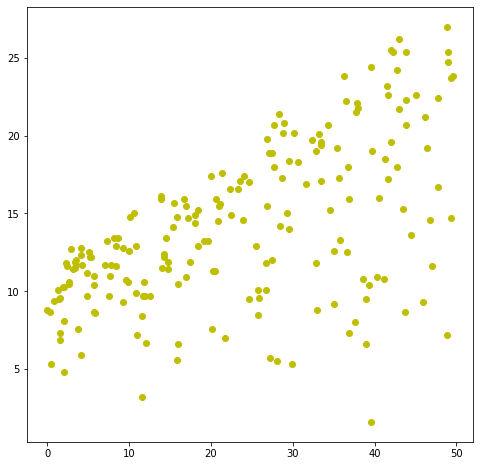

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(adv['radio'], adv['sales'], c= 'y')
plt.show()

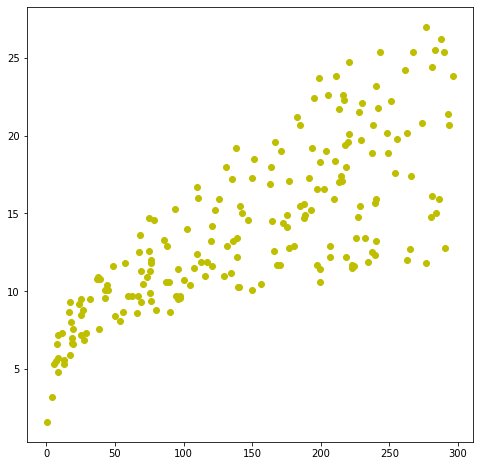

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(adv['TV'], adv['sales'], c= 'y')
plt.show()

In [14]:
adv_corr = adv.corr()
adv_corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


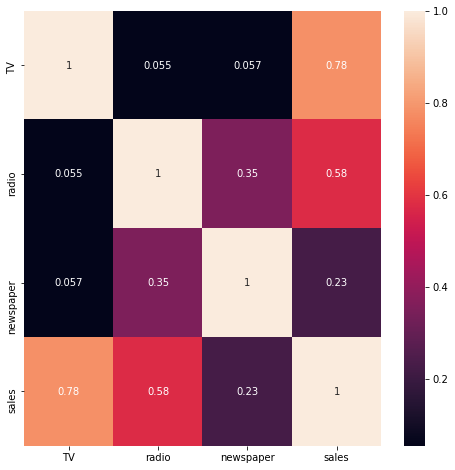

In [16]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(adv_corr, annot= True)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
#single var

X = adv['TV'].values.reshape(-1,1)
Y = adv['sales'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30, random_state= 0)

In [23]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           4.76e-26
Time:                        11:27:33   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

In [25]:
linear_reg = LinearRegression(normalize= True).fit(x_train, y_train)
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
print("Training_score : ", linear_reg.score(x_train, y_train))

Training_score :  0.5552336104251211


In [29]:
y_pred = linear_reg.predict(x_test)

In [31]:
from sklearn.metrics import r2_score

print("testing score: ", r2_score(y_test, y_pred))

testing score:  0.725606346597073


In [34]:
def adj_r2(r2, labels, features):
    adj_r2 = 1-((1-r2)*(len(labels)-1))/(len(labels)-features.shape[1]-1)
    
    return adj_r2

print("adjusted r2 score is ", adj_r2(r2_score(y_test, y_pred), y_test, x_test))

adjusted r2 score is  0.7208754215384019


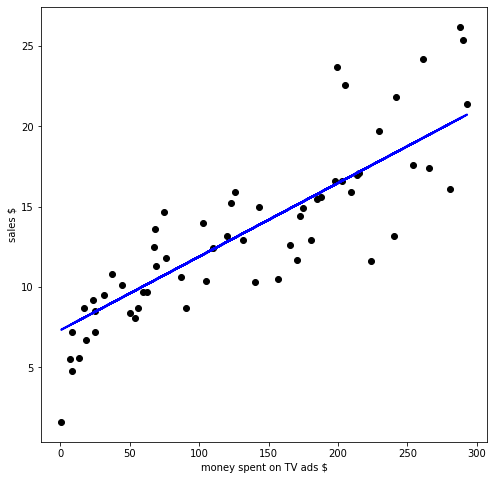

In [36]:
plt.figure(figsize= (8,8))
plt.scatter(x_test, y_test, c= "black")
plt.plot(x_test, y_pred, c= "blue", linewidth = 2)
plt.xlabel("money spent on TV ads $")
plt.ylabel("sales $")
plt.show()

In [40]:
#multiple var

X = adv.drop('sales', axis= 1)
Y = adv['sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30)

In [42]:
x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.0
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           2.00e-69
Time:                        11:47:28   Log-Likelihood:                -271.75
No. Observations:                 140   AIC:                             551.5
Df Residuals:                     136   BIC:                             563.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7415      0.372      7.378      0.0

In [45]:
linear_reg = LinearRegression(normalize= True).fit(x_train, y_train)
linear_reg

print("Training_score : ", linear_reg.score(x_train, y_train))

y_pred = linear_reg.predict(x_test)
print("testing score: ", r2_score(y_test, y_pred))

print("adjusted r2 score is ", adj_r2(r2_score(y_test, y_pred), y_test, x_test))

Training_score :  0.9054325847687088
testing score:  0.8625079426168702
adjusted r2 score is  0.8551422966856311
